# Figure 2 & Supplemental Fig. 4

In [46]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from uncertainties import ufloat
import uncertainties
from tqdm.auto import tqdm
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

## Supplemental Fig. 4a-c
### ATP Yield per molecule of glucose

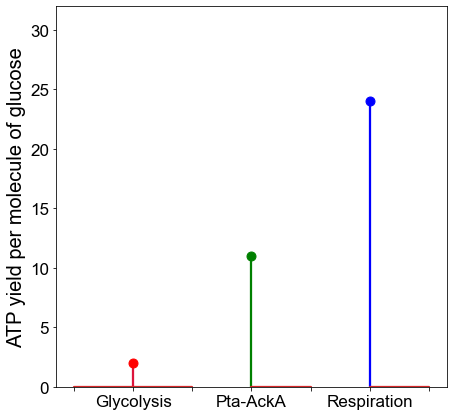

In [2]:
#Exended Data Fig. 4a
#ATP yield per molecule of glucose for E. coli

#ATP yield for ecoli 
Y_Glyc = 2
Y_Pta_acka = 11
Y_Resp = 24

#make three dataframes with fermentation and respiration yield values
d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
d2 = {'yield': [Y_Pta_acka, -1], 'pathway': ['Pta-AckA', ' ']}
d3 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', '    ']}
df = pd.DataFrame(data=d)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)

#generate figure
fig, ax = plt.subplots(figsize = (7,7))
sns.set_style("white", {"axes.edgecolor": "black"})
sns.set_context("talk")
plt.ylim(0,32)

plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
plt.stem(df2['pathway'], df2['yield'], 'green', markerfmt = "go")
plt.stem(df3['pathway'], df3['yield'], 'blue', markerfmt = "bo")

plt.ylabel('ATP yield per molecule of glucose',fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)

plt.show()

#save figure
fig.savefig('./Figures/edf4a_ecoli_yield.svg',format='svg', dpi=1200)

In [3]:
def yieldPlot(Y_Glyc, Y_Resp):
    
    '''Takes the ATP yield per molecule values for fermentation and respiration and generates a stem plot'''
    
    #make two dataframes with fermentation and respiration yield values
    d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
    d2 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', ' ']}
    df = pd.DataFrame(data=d)
    df2 = pd.DataFrame(data=d2)

    #generate figure
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")
    plt.ylim(0,32)

    plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
    plt.stem(df2['pathway'], df2['yield'], 'darkblue', markerfmt = "bo")

    plt.ylabel('ATP yield per molecule of glucose',fontsize=20)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    
    return(fig)

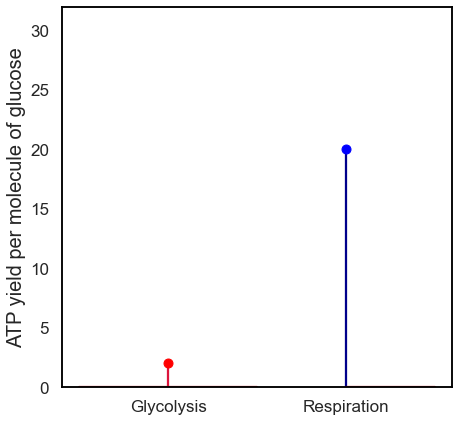

In [4]:
#Exended Data Fig. 4b
#ATP yield per molecule of glucose for S. cerevisiae
yeast_yield = yieldPlot(2, 20)

#save figure
yeast_yield.savefig('./Figures/edf4b_scerevisiae_yield.svg',format='svg', dpi=1200)

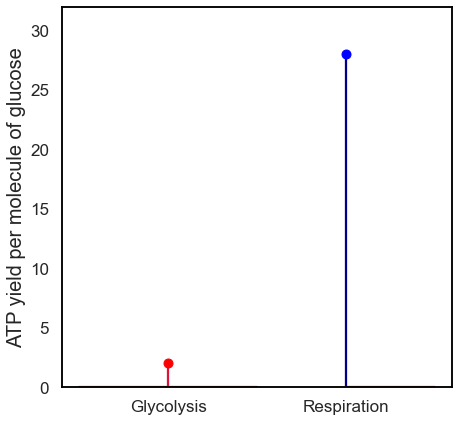

In [5]:
#Exended Data Fig. 4c
#ATP yield per molecule of glucose for mammalian cells 
mammalian_yield = yieldPlot(2, 28)

#save figure
mammalian_yield.savefig('./Figures/edf4c_mammalian_yield.svg',format='svg', dpi=1200)

## Supplemental Fig. 4d-f
### Proteome Occupany of Respiration, Glycolysis, and Total ATP-Producing Space

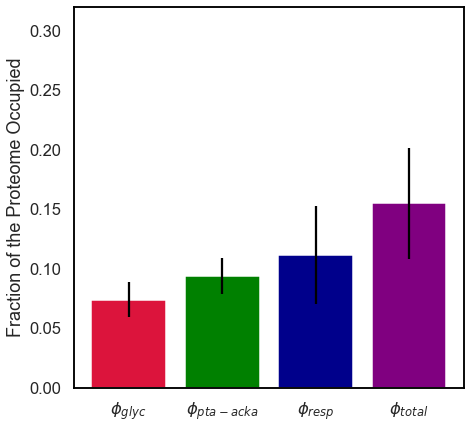

In [6]:
#Exended Data Fig. 4d
#Proteome Occupany of E. coli 

#parameter estimates for e. coli proteome occupany
total_proteomics = pd.read_csv('./Data/ecoli_proteomics_sum_total.csv')
ferm_proteomics = pd.read_csv('./Data/ecoli_specific_activity_fermentation_no_ETC_occupancy.csv')
pta_acka_proteomics = pd.read_csv('./Data/ecoli_specific_activity_ferm_occupancy.csv')
resp_proteomics = pd.read_csv('./Data/ecoli_specific_activity_resp_occupancy.csv')

#calculate mean and std for fermentation and respiration 
ferm_mean = ferm_proteomics['value'].mean()
ferm_std = ferm_proteomics['value'].std()
pta_acka_mean = pta_acka_proteomics.loc[pta_acka_proteomics['estimate']=='fermentation', 'value'].mean()
pta_acka_std = pta_acka_proteomics.loc[pta_acka_proteomics['estimate']=='fermentation', 'value'].std()
resp_mean = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].mean()
resp_std = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].std()
total_mean = total_proteomics['value'].mean()
total_std = total_proteomics['value'].std()

#generate figure
fig, ax = plt.subplots(figsize = (7,7))
sns.set_style("white", {"axes.edgecolor": "black"})
sns.set_context("talk")

#create a dataset
frac = [ferm_mean, pta_acka_mean, resp_mean, total_mean]
frac_std = [ferm_std, pta_acka_std, resp_std, total_std]
label_list = ['$\phi_{glyc}$', '$\phi_{pta-acka}$', '$\phi_{resp}$', '$\phi_{total}$']
x_pos = np.arange(len(frac))
    
#create bars with different colors
ax.bar(x_pos, frac, color=['crimson', 'green', 'darkblue', 'purple'], yerr = frac_std)

#create names on the x-axis
plt.xticks(x_pos, label_list)
plt.ylim(0,0.32)

#crate y-axis label
plt.ylabel('Fraction of the Proteome Occupied')

#save fig
fig.savefig('./Figures/edf4d_ecoli_proteome_fraction_occupied.svg',format='svg', dpi=1200)

In [7]:
def proteomeSpace(ferm_proteomics, resp_proteomics, total_proteomics):
    
    '''Takes proteome sum .csv for an organism and calculates mean and std for 
    respiration, fermentation, and total ATP-producing space. Returns a bar graph.'''
    
    #read proteome occupancy summary .csv
    #proteomics = pd.read_csv(csv)
    
    #calculate mean and std for fermentation and respiration 
    ferm_mean = ferm_proteomics.loc[ferm_proteomics['estimate']=='fermentation', 'value'].mean()
    ferm_std = ferm_proteomics.loc[ferm_proteomics['estimate']=='fermentation', 'value'].std()
    resp_mean = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].mean()
    resp_std = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].std()
    total_mean = total_proteomics['value'].mean()
    total_std = total_proteomics['value'].std()
    
    #generate figure 2D
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")

    #create a dataset
    frac = [ferm_mean, resp_mean, total_mean]
    frac_std = [ferm_std, resp_std, total_std]
    label_list = ['$\phi_{glyc}$', '$\phi_{resp}$', '$\phi_{total}$']
    x_pos = np.arange(len(frac))
    
    #create bars with different colors
    ax.bar(x_pos, frac, color=['crimson', 'darkblue', 'purple'], yerr = frac_std)

    #create names on the x-axis
    plt.xticks(x_pos, label_list)
    plt.ylim(0,0.32)

    #crate y-axis label
    plt.ylabel('Fraction of the Proteome Occupied')
    
    return(fig)

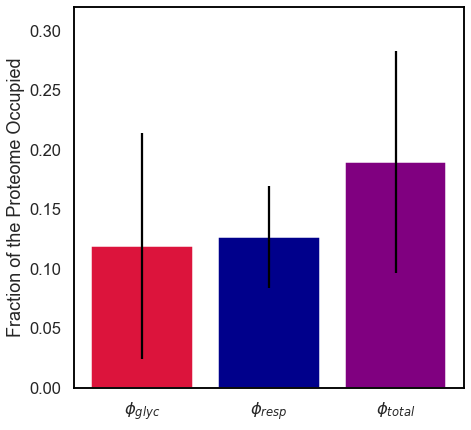

In [8]:
#Exended Data Fig. 4e
#Proteome Occupany of S. cerevisiae

#parameter estimates for proteome occupany
total_proteomics = pd.read_csv('./Data/yeast_proteomics_sum_total.csv')
resp_proteomics = pd.read_csv('./Data/yeast_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/yeast_specific_activity_ferm_occupancy.csv')

#S. cerevisiae Proteome Occupancy
fig = proteomeSpace(ferm_proteomics, resp_proteomics, total_proteomics)

#save fig
fig.savefig('./Figures/edf4e_scerevisiae_proteome_fraction_occupied.svg',format='svg', dpi=1200)

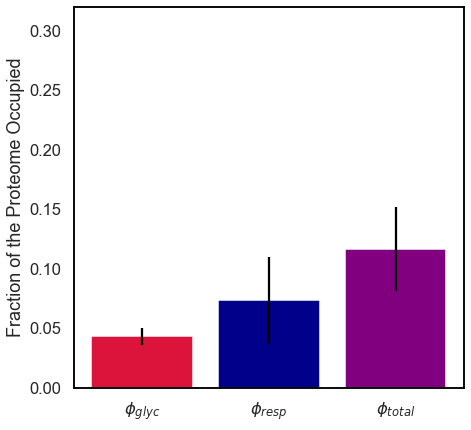

In [9]:
#Exended Data Fig. 4f
#Proteome Occupany of Mammalian Cells 

#parameter estimates for proteome occupany
total_proteomics = pd.read_csv('./Data/mammalian_proteomics_sum.csv')
resp_proteomics = pd.read_csv('./Data/mammalian_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/mammalian_specific_activity_ferm_occupancy.csv')

#mammalian cell proteome occupany
fig = proteomeSpace(ferm_proteomics, resp_proteomics, total_proteomics)

#save fig
fig.savefig('./Figures/edf4f_mammalian_proteome_fraction_occupied.svg',format='svg', dpi=1200)

## Fig. 2a-c
### Ratio of the maximal ATP production rate 

In [10]:
def atpRatio(rates, ferm_proteomics, resp_proteomics, gly_proteomics, Y_Ferm, Y_Resp): 
    
    '''Performs bootstrapping to resample the five parameter estimates (i.e. fraction of 
    the proteome occupied by pathway, specific activity, and ATP yield) with replacement (N=10,000). 
    After each round of sampling, the specific activity of each pathway is calculated. The sampled 
    parameter values for proteome occupied by pathway, pathway activity, and ATP yield from each 
    round of bootstrapping are used in the linear program described in the function above. 
    All 10,000 results are stored in a data frame, which in the output. This function 
    uses experimental cellular data (approach two) as described in the manuscript '''

    results_final = []
    
    for j in tqdm(range(10000)):
    
        #random choice with replacement for each paramter 
        sample_activity_respiration = rates.loc[rates['pathway'] == 'Respiration', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique()
        #print(sample_activity_respiration)
        sample_activity_fermentation = rates.loc[rates['pathway'] == 'Fermentation', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique()
        #print(sample_activity_fermentation)
        sample_mass_respiraition = resp_proteomics.loc[(resp_proteomics['estimate'] == 'respiration'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_fermentation = ferm_proteomics.loc[(ferm_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_glycolysis = gly_proteomics.loc[(gly_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        
        sample_size_activity_respiration = len(sample_activity_respiration)
        sample_size_activity_fermentation = len(sample_activity_fermentation)
        sample_size_mass_respiraition = len(sample_mass_respiraition)
        sample_size_mass_fermentation = len(sample_mass_fermentation)
        sample_size_mass_glycolysis= len(sample_mass_glycolysis)
    
        sample_specific_activity_fermentation = np.random.choice(sample_activity_fermentation, size=sample_size_activity_fermentation,replace=True)
        sample_specific_activity_respiration = np.random.choice(sample_activity_respiration, size=sample_size_activity_respiration, replace=True)
        sample_fraction_fermentation = np.random.choice(sample_mass_fermentation, size=sample_size_mass_fermentation, replace=True)
        sample_fraction_respiration = np.random.choice(sample_mass_respiraition, size=sample_size_mass_respiraition, replace=True)
        sample_fraction_glycolysis = np.random.choice(sample_mass_glycolysis, size=sample_size_mass_glycolysis, replace=True)
        
        V_Ferm =  sample_specific_activity_fermentation.mean() / sample_fraction_fermentation.mean() 
        V_Resp =  sample_specific_activity_respiration.mean() / sample_fraction_respiration.mean() 
        V_Correction = sample_specific_activity_fermentation.mean() / sample_fraction_glycolysis.mean()
        
        rate_ratio = V_Resp / V_Correction
        
        V_Resp =  sample_specific_activity_respiration.mean() / (sample_fraction_respiration.mean() + sample_fraction_glycolysis.mean() * rate_ratio)

        #ATP yield
        Y_Ferm = Y_Ferm
        Y_Resp = Y_Resp
        
        #ATP Production Rate 
        V_Ferm_ATP = V_Ferm * Y_Ferm
        V_Resp_ATP = V_Resp * Y_Resp
        
        ATP_ratio = V_Ferm_ATP / V_Resp_ATP
        
        #Append the outputs for each bootstrap iteration
        results_final.append(ATP_ratio)
        
    return(results_final)

In [11]:
def atpCI(sample): 
    
    '''Caclulates the 95 percent confidence interval of the atpRatio function'''
    
    conf95_high = []
    conf95_low = []
    
    sample = sample
    sample_count = len(sample)
    sample_high = sample_count * .975
    sample_low = sample_count * .025
    sample = np.sort(sample)
    conf95_high = np.append(conf95_high, sample[int(sample_high) - 1])
    conf95_low = np.append(conf95_low, sample[int(sample_low) - 1])
        
    df = pd.DataFrame({'conf95_low': conf95_low, 'conf95_high': conf95_high},  
                      index = ['cellular'])
    
    return(df)  

In [12]:
#ATP production ratios for E. coli using experiemntal cellular data for Fig. 2a

#parameter estimates for proteome occupany
proteomics = pd.read_csv('./Data/ecoli_proteomics_sum_total.csv')
#proteomics = proteomics.groupby('variable').sum().reset_index()
#parameters estimates for specfic activity
rates = pd.read_csv('./Data/ecoli_cellular_rates.csv')
#parameters estimates for specfic activity proteome
resp_proteomics = pd.read_csv('./Data/ecoli_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/ecoli_specific_activity_ferm_occupancy.csv')
ferm_anaerobic_proteomics = pd.read_csv('./Data/ecoli_specific_activity_fermentation_no_ETC_occupancy.csv')

#ATP production ratio for the pta_acka pathway
ecoli_atpRatio_pta_acka = atpRatio(rates, ferm_proteomics, resp_proteomics, ferm_anaerobic_proteomics, 11, 24)

#ATP production ratio CI95 for the pta_acka pathway
ecoli_atpRatio_CI95_pta_acka = atpCI(ecoli_atpRatio_pta_acka)

#ATP production ratio for fermentation
ecoli_atpRatio_fermentation = atpRatio(rates, ferm_anaerobic_proteomics, resp_proteomics, ferm_anaerobic_proteomics, 2, 24)

#ATP production ratio CI95 for fermentation
ecoli_atpRatio_CI95_fermentation = atpCI(ecoli_atpRatio_fermentation)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [13]:
np.mean(ecoli_atpRatio_pta_acka)

1.5319600127713608

In [14]:
np.mean(ecoli_atpRatio_fermentation)

0.35455891569833914

In [15]:
#ATP production ratios for E. coli using molecular weight and stoich data for Fig. 2a

#Read in the E. coli inclusion list  
ecoli_inclusion = pd.read_csv('./Data/ecoli_inclusion.csv')
ecoli_inclusion = ecoli_inclusion[['EC number', 'pathway', 'Gene name', 'Accession', 'MW', 'meta_pathway']]

#Read in the molecular weight list for each EC number
ecoli_mw = pd.read_csv('./Data/ecoli_mw.csv')
ecoli_mw = ecoli_mw[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ecoli_inclusion = pd.merge(ecoli_inclusion, ecoli_mw, how = 'left', on = 'EC number')

#save as extended data table 
ecoli_inclusion.to_csv('./Data/ecoli_stoich_mass.csv')

#Fermentation Mass
ecoli_inclusion_ferm = ecoli_inclusion.loc[ecoli_inclusion['meta_pathway'] == 'fermentation']
ecoli_inclusion_ferm = ecoli_inclusion_ferm[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ferm_mass = ecoli_inclusion_ferm[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ferm_mass.drop_duplicates(inplace = True)
ferm_mass_pathway = ferm_mass.sum()[2]

#Respiration Mass
ecoli_inclusion_resp = ecoli_inclusion.loc[ecoli_inclusion['meta_pathway'] == 'respiration']
ecoli_inclusion_resp = ecoli_inclusion_resp[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ecoli_inclusion_resp.loc[ecoli_inclusion_resp['Gene name'] == 'ndh', 'pathway_stoich'] = 10 
ecoli_inclusion_resp['MW*Subunit_Stoich*Pathway_Stoich'] = ecoli_inclusion_resp['pathway_stoich'] * ecoli_inclusion_resp['MW*Subunit_Stoich']
resp_mass = ecoli_inclusion_resp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
resp_mass.drop_duplicates(inplace = True)
resp_mass_pathway = resp_mass.sum()[2]

#Glycolysis Mass
ecoli_inclusion_glycolysis = ecoli_inclusion.loc[ecoli_inclusion['pathway'] == 'glycolysis']
ecoli_inclusion_glycolysis = ecoli_inclusion_glycolysis[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
glycolysis_mass = ecoli_inclusion_glycolysis[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
glycolysis_mass.drop_duplicates(inplace = True)
glycolysis_mass_pathway = glycolysis_mass.sum()[2]

#ETC Mass
ecoli_inclusion_etc = ecoli_inclusion.loc[ecoli_inclusion['pathway'] == 'etc']
ecoli_inclusion_etc = ecoli_inclusion_etc[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ecoli_inclusion_etc.loc[(ecoli_inclusion_etc['EC number'] == '7.1.1.2') | (ecoli_inclusion_etc['Gene name'] == 'ndh'), 'pathway_stoich'] = 4
ecoli_inclusion_etc.loc[(ecoli_inclusion_etc['EC number'] == '7.1.1.3') | (ecoli_inclusion_etc['EC number'] == '7.1.1.7.1')| (ecoli_inclusion_etc['EC number'] == '7.1.1.7.2'), 'pathway_stoich'] = 2
ecoli_inclusion_etc['MW*Subunit_Stoich*Pathway_Stoich'] = ecoli_inclusion_etc['pathway_stoich'] * ecoli_inclusion_etc['MW*Subunit_Stoich']
etc_mass = ecoli_inclusion_etc[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
etc_mass.drop_duplicates(inplace = True)
etc_mass_pathway = etc_mass.sum()[2]

#ATP Mass
ecoli_inclusion_atp = ecoli_inclusion.loc[ecoli_inclusion['pathway'] == 'atp']
ecoli_inclusion_atp = ecoli_inclusion_atp[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ecoli_inclusion_atp['pathway_stoich'] = 3.2
ecoli_inclusion_atp['MW*Subunit_Stoich*Pathway_Stoich'] = ecoli_inclusion_atp['pathway_stoich'] * ecoli_inclusion_atp['MW*Subunit_Stoich']
atp_mass = ecoli_inclusion_atp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
atp_mass.drop_duplicates(inplace = True)
atp_mass_pathway = atp_mass.sum()[2]

#Calculating the total mass of each pathway
fermentation_mass_pathway_total = ferm_mass_pathway
pta_acka_mass_pathway_total = ferm_mass_pathway + etc_mass_pathway + atp_mass_pathway
resp_mass_pathway_total = resp_mass_pathway + glycolysis_mass_pathway

In [16]:
#ATP production ratios for E. coli using molecular weight and stoichiometry data for Fig. 2a

#ATP yield for ecoli 
y_fermentation = 2
y_pta_acka = 11
y_resp = 24

#Mass * Pathway Stoichometry for Pta-AckA pathway / Respiration
mass_pathway_pta_acka = (1/pta_acka_mass_pathway_total * y_pta_acka) / ((1/ (resp_mass_pathway_total)) * y_resp)

#Mass * Pathway Stoichometry for Fermentation / Respiration
mass_pathway_fermentation = (1/fermentation_mass_pathway_total * y_fermentation) / ((1/ (resp_mass_pathway_total)) * y_resp)

In [17]:
#Format df for plotting 
ecoli_atpRatio_CI95_pta_acka.loc['mass'] = [mass_pathway_pta_acka, mass_pathway_pta_acka]
ecoli_atpRatio_CI95_pta_acka['pathway'] = 'Pta-AckA'
ecoli_atpRatio_CI95_pta_acka = ecoli_atpRatio_CI95_pta_acka.reindex(index = ['mass', 'cellular'])

ecoli_atpRatio_CI95_fermentation.loc['mass'] = [mass_pathway_fermentation, mass_pathway_fermentation]
ecoli_atpRatio_CI95_fermentation['pathway'] = 'Glycolysis'
ecoli_atpRatio_CI95_fermentation = ecoli_atpRatio_CI95_fermentation.reindex(index = ['mass', 'cellular'])

ecoli_CI95 = pd.concat([ecoli_atpRatio_CI95_fermentation, ecoli_atpRatio_CI95_pta_acka])

data = {'variable': ['mass', 'cellular', 'mass', 'cellular'],
        'value': [mass_pathway_pta_acka, np.mean(ecoli_atpRatio_pta_acka), mass_pathway_fermentation, np.mean(ecoli_atpRatio_fermentation)], 
        'pathway': ['Pta-AckA', 'Pta-AckA', 'Glycolysis', 'Glycolysis']}
 
# Create DataFrame
df = pd.DataFrame(data)

In [18]:
def activityPlot(data, ci):
    
    '''Uses the df with ATP ratios and creates a bar plot with CI95 for E. coli'''

    fig, ax = plt.subplots(figsize=(8,8))

    # plot a bar chart
    colors = ["crimson", "crimson", "green", "green"]
    customPalette = sns.set_palette(sns.color_palette(colors))
    
    #calculates the assigns the error position based on the CI95
    yerr = ci
    yerr_subset = yerr.loc[yerr.index.isin(data['variable'])]
    yerr_subset.reset_index(inplace = True)
    yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
    yerr_subset = pd.merge(yerr_subset, data, on = ['variable', 'pathway'])
    yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
    yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
    yerr_subset['new_axis'] = yerr_subset['variable'] + ' ' + yerr_subset['pathway']
    yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])
    
    #bar plot with custom error bars 
    sns.barplot(x="new_axis", y="value", data=yerr_subset, dodge = True)
    plt.errorbar(x=yerr_subset["new_axis"], y=yerr_subset["value"], yerr = yerr2, fmt = 'none', capsize = 7, color = 'black')
    #axis format
    ax.set_ylabel('', fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.axhline(y=1, color='black', linestyle='--')
    plt.xticks(rotation = 45, ha="right")

    ax.set_ylabel(r'$ V_{glyc}^{ATP} / V_{resp}^{ATP}$', fontsize=23)
    ax.grid(b=True, which='minor', linestyle='-', linewidth='0.2')
    ax.tick_params(axis='both', which='major', labelsize=20)

    custom = [Line2D([], [], marker='s', color='crimson', linestyle='None'),
              Line2D([], [], marker='s', color='green', linestyle='None')]
    
    plt.legend(custom, ['Glycolysis', 'Pta-AckA'], fontsize = 14, loc='upper left')

    return(fig)

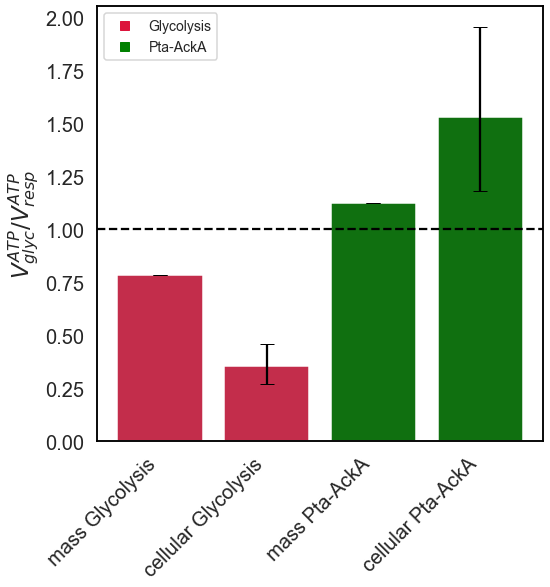

In [19]:
#ATP production ratios for E. coli Fig. 2a
fig = activityPlot(df, ecoli_CI95)

fig.savefig('./Figures/fig2a_ecoli_atp_ratio.svg',format='svg', dpi=1200)

In [20]:
#ATP production ratios for S. cerevisiae using experiemntal cellular data for Fig. 2b

#parameter estimates for proteome occupany
resp_proteomics = pd.read_csv('./Data/yeast_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/yeast_specific_activity_ferm_occupancy.csv')

#rates
rates = pd.read_csv('./Data/yeast_cellular_rates.csv')

#ATP production ratio for S. cerevisiae
yeast_atpRatio = atpRatio(rates, ferm_proteomics, resp_proteomics, ferm_proteomics, 2, 20)

#ATP production ratio CI95 for S. cerevisiae
yeast_atpRatio_CI95_fermentation = atpCI(yeast_atpRatio)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [21]:
#ATP production ratios for S. cerevisiae using molecular weight and stoich data for Fig. 2b

#read in the S. cerevisiae inclusion list  
yeast_inclusion = pd.read_csv('./Data/yeast_inclusion.csv')
#Read in the molecular weight list for each EC number
yeast_mw = pd.read_csv('./Data/yeast_mw.csv')
yeast_mw = yeast_mw[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
yeast_inclusion = pd.merge(yeast_inclusion, yeast_mw, how = 'left', on = 'EC number')
yeast_inclusion.drop(columns = {'Unnamed: 0'}, inplace = True)
yeast_inclusion.drop_duplicates(inplace = True)

#Extended Data Table
yeast_inclusion.to_csv('./Data/yeast_stoich_mass.csv')

yeast_inclusion_ferm = yeast_inclusion.loc[yeast_inclusion['meta_pathway'] == 'fermentation']
yeast_inclusion_ferm = yeast_inclusion_ferm[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ferm_mass = yeast_inclusion_ferm[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ferm_mass.drop_duplicates(inplace = True)
ferm_mass_pathway = ferm_mass.sum()[2]

yeast_inclusion_resp = yeast_inclusion.loc[yeast_inclusion['meta_pathway'] == 'respiration']
yeast_inclusion_resp = yeast_inclusion_resp[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
resp_mass = yeast_inclusion_resp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
resp_mass.drop_duplicates(inplace = True)
resp_mass_pathway = resp_mass.sum()[2]

yeast_inclusion_glycolysis = yeast_inclusion.loc[yeast_inclusion['pathway'] == 'glycolysis']
yeast_inclusion_glycolysis = yeast_inclusion_glycolysis[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
glycolysis_mass = yeast_inclusion_glycolysis[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
glycolysis_mass.drop_duplicates(inplace = True)
glycolysis_mass_pathway = glycolysis_mass.sum()[2]

In [22]:
#Pathway Yields
Y_ferm = 2
Y_resp = 20

#Mass * Pathway Stoichometry for Fermentation / Respiration in S. cereivisae
mass_pathway = (1/ferm_mass_pathway * Y_ferm) / ((1/ (resp_mass_pathway + glycolysis_mass_pathway)) * Y_resp)

In [23]:
#Format df for plotting 
yeast_atpRatio_CI95_fermentation.loc['mass'] = [mass_pathway,mass_pathway]
yeast_atpRatio_CI95_fermentation = yeast_atpRatio_CI95_fermentation.reindex(index = ['mass', 'cellular'])
data = {'variable': ['mass', 'cellular'],
        'value': [mass_pathway, np.mean(yeast_atpRatio)]}
# Create DataFrame
df = pd.DataFrame(data)

In [24]:
def activityPlot(data, ci):

    fig, ax = plt.subplots(figsize=(8,8))
    
    '''Uses the df with ATP ratios and creates a bar plot with CI95 for S. cerevisiae and mammalian cells'''

    # plot a bar chart
    colors = ["crimson", "crimson"]
    customPalette = sns.set_palette(sns.color_palette(colors))
    summarystats = data
    
    yerr = ci
    yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
    yerr_subset.reset_index(inplace = True)
    yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
    yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
    yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
    yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
    yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])

    sns.barplot(x="variable", y="value", data=data, dodge = False)
    plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 7)
        
    #axis format
    ax.set_ylabel('', fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.axhline(y=1, color='black', linestyle='--')

    ax.set_ylabel(r'$ V_{glyc}^{ATP} / V_{resp}^{ATP}$', fontsize=23)

    ax.legend(fontsize=13).set_title('')
    #ax.set(yscale="log")

    ax.legend_.remove()
    ax.grid(b=True, which='minor', linestyle='-', linewidth='0.2')
    ax.tick_params(axis='both', which='major', labelsize=20)

    return(fig)

No handles with labels found to put in legend.


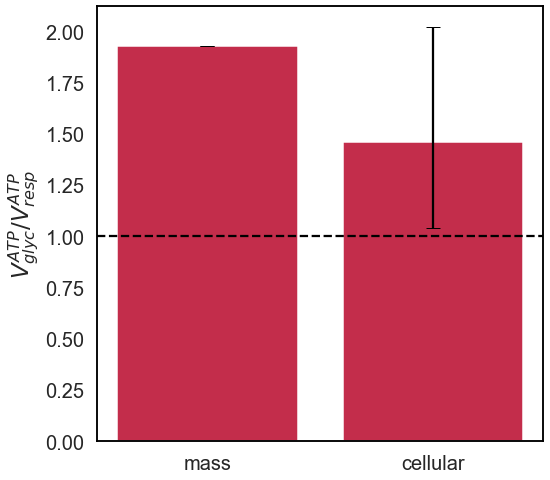

In [25]:
#ATP production ratios for S. cerevisiae Fig. 2b
fig = yeast_ratio_fig = activityPlot(df, yeast_atpRatio_CI95_fermentation)

fig.savefig('./Figures/fig2b_scerevisiae_atp_ratio.svg',format='svg', dpi=1200)

In [26]:
#ATP production ratios for mammalian cells using experiemntal cellular data for Fig. 2c

#parameter estimates for proteome occupany
resp_proteomics = pd.read_csv('./Data/mammalian_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/mammalian_specific_activity_ferm_occupancy.csv')

#parameter estimates for rates
rates = pd.read_csv('./Data/mammalian_cellular_rates.csv')

#ATP production ratio for mammalian cells
mammalian_atpRatio = atpRatio(rates, ferm_proteomics, resp_proteomics, ferm_proteomics, 2, 28)

#ATP production ratio CI95 for mammalian cells
mammalian_atpRatio_CI95_fermentation = atpCI(mammalian_atpRatio)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [27]:
#ATP production ratios for mammalian using molecular weight and stoich data for Fig. 2c

#Read in the mammalian inclusion list  
mammalian_inclusion = pd.read_csv('./Data/mammalian_inclusion.csv')
mammalian_inclusion = mammalian_inclusion[['EC number', 'pathway', 'Gene name', 'MW', 'meta_pathway']]

#Read in the molecular weight list for each EC number
mammalian_mw = pd.read_csv('./Data/mammalian_mw.csv')
mammalian_mw = mammalian_mw[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
mammalian_inclusion = pd.merge(mammalian_inclusion, mammalian_mw, how = 'left', on = 'EC number')

#Extended Data Table
mammalian_inclusion.to_csv('./Data/mammalian_mass_stoich.csv')

mammalian_inclusion_ferm = mammalian_inclusion.loc[mammalian_inclusion['meta_pathway'] == 'fermentation']
ferm_mass = mammalian_inclusion_ferm[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ferm_mass.drop_duplicates(inplace = True)
ferm_mass_pathway = ferm_mass.sum()[2]

mammalian_inclusion_resp = mammalian_inclusion.loc[mammalian_inclusion['meta_pathway'] == 'respiration']
resp_mass = mammalian_inclusion_resp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
resp_mass.drop_duplicates(inplace = True)
resp_mass_pathway = resp_mass.sum()[2]

mammalian_inclusion_glycolysis = mammalian_inclusion.loc[mammalian_inclusion['pathway'] == 'glycolysis']
glycolysis_mass = mammalian_inclusion_glycolysis[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
glycolysis_mass.drop_duplicates(inplace = True)
glycolysis_mass_pathway = glycolysis_mass.sum()[2]


In [28]:
#Pathway Yields
Y_ferm = 2
Y_resp = 28

#Mass * Pathway Stoichometry for Fermentation / Respiration in mammalian cells 
mass_pathway = (1/ferm_mass_pathway * Y_ferm) / ((1/ (resp_mass_pathway + glycolysis_mass_pathway)) * Y_resp)

In [29]:
#Format df for plotting 
mammalian_atpRatio_CI95_fermentation.loc['mass'] = [mass_pathway,mass_pathway]
mammalian_atpRatio_CI95_fermentation = mammalian_atpRatio_CI95_fermentation.reindex(index = ['mass', 'cellular'])
data = {'variable': ['mass', 'cellular'],
        'value': [mass_pathway, np.mean(mammalian_atpRatio)]}
 
# Create DataFrame
df = pd.DataFrame(data)

No handles with labels found to put in legend.


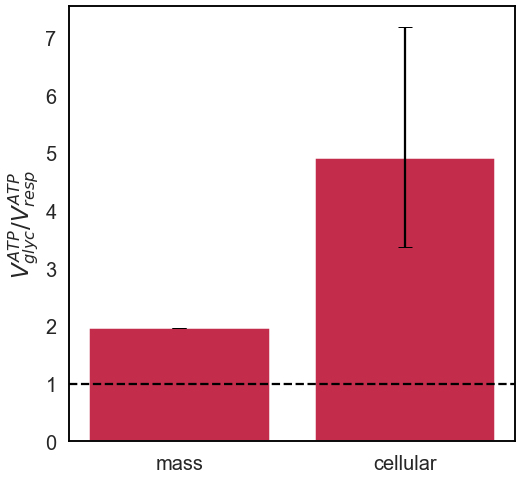

In [30]:
#ATP production ratios for mammalian Fig. 2c
fig = mammalian_ratio_fig = activityPlot(df, mammalian_atpRatio_CI95_fermentation)
fig.savefig('./Figures/fig2c_mammalian_atp_ratio.svg',format='svg', dpi=1200)

## Supplemental Fig. 3g-i & Fig. 2d-f
### Glucose consumption and ATP production rate (mmol gprotein-1 hr-1)

In [31]:
def waburgRates(rates, anaerobic_proteomics, ferm_proteomics, resp_proteomics, gly_proteomics, Y_Anaerobic, Y_Ferm, Y_Resp): 
    
    '''For E. coli, performs bootstrapping to resample the five parameter estimates (i.e. fraction of 
    the proteome occupied by pathway, specific activity, and ATP yield) with replacement (N=10,000). 
    After each round of sampling, the specific activity of each pathway is calculated. The sampled 
    parameter values for proteome occupied by pathway, specific activity, and ATP yield from each 
    round of bootstrapping are used in the linear program described in the function above. 
    All 10,000 results are stored in a data frame, which in the output.'''

    results_final = []
    
    for j in tqdm(range(10000)):
    
        #random choice with replacement for each paramter 
        sample_activity_respiration = rates.loc[rates['pathway'] == 'Respiration', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique()
        #print(sample_activity_respiration)
        sample_activity_fermentation = rates.loc[rates['pathway'] == 'Fermentation', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique()
        #print(sample_activity_fermentation)
        sample_activity_anaerobic = rates.loc[rates['pathway'] == 'Fermentation', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique()
        #print(sample_activity_anaerobic)
        sample_mass_respiraition = resp_proteomics.loc[(resp_proteomics['estimate'] == 'respiration'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_fermentation = ferm_proteomics.loc[(ferm_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_anaerobic = anaerobic_proteomics.loc[(anaerobic_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        #print(sample_mass_anaerobic)
        sample_mass_glycolysis = gly_proteomics.loc[(gly_proteomics['estimate'] == 'fermentation'), 'value'].unique()
           
        sample_size_activity_respiration = len(sample_activity_respiration)
        sample_size_activity_fermentation = len(sample_activity_fermentation)
        sample_size_activity_anaerobic = len(sample_activity_anaerobic)
        sample_size_mass_respiraition = len(sample_mass_respiraition)
        sample_size_mass_fermentation = len(sample_mass_fermentation)
        sample_size_mass_anaerobic = len(sample_mass_anaerobic)
        sample_size_mass_glycolysis= len(sample_mass_glycolysis)
    
        sample_specific_activity_fermentation = np.random.choice(sample_activity_fermentation, size=sample_size_activity_fermentation,replace=True)
        sample_specific_activity_respiration = np.random.choice(sample_activity_respiration, size=sample_size_activity_respiration, replace=True)
        sample_specific_activity_anaerobic = np.random.choice(sample_activity_anaerobic, size=sample_size_activity_anaerobic, replace=True)
        
        sample_fraction_fermentation = np.random.choice(sample_mass_fermentation, size=sample_size_mass_fermentation, replace=True)
        sample_fraction_respiration = np.random.choice(sample_mass_respiraition, size=sample_size_mass_respiraition, replace=True)
        sample_fraction_anaerobic = np.random.choice(sample_mass_anaerobic, size=sample_size_mass_anaerobic, replace=True)
        sample_fraction_glycolysis = np.random.choice(sample_mass_glycolysis, size=sample_size_mass_glycolysis, replace=True)
        
        V_Ferm =  sample_specific_activity_fermentation.mean() / sample_fraction_fermentation.mean() 
        V_Resp =  sample_specific_activity_respiration.mean() / sample_fraction_respiration.mean() 
        V_Anaerobic = sample_specific_activity_anaerobic.mean() / sample_fraction_anaerobic.mean() 
        V_Correction = sample_specific_activity_fermentation.mean() / sample_fraction_glycolysis.mean()
        #print(sample_fraction_anaerobic.mean())
    
        rate_ratio = V_Resp / V_Anaerobic
        
        V_Resp =  sample_specific_activity_respiration.mean() / (sample_fraction_respiration.mean() + sample_fraction_glycolysis.mean() * rate_ratio)

        #ATP yield
        Y_Ferm = Y_Ferm
        Y_Resp = Y_Resp
        Y_Anaerobic = Y_Anaerobic
        
        #ATP Production Rate 
        V_Ferm_ATP = V_Ferm * Y_Ferm
        V_Resp_ATP = V_Resp * Y_Resp
        V_Anaerobic_ATP = V_Anaerobic * Y_Anaerobic
        #print(V_Anaerobic_ATP)
        
        results = [V_Anaerobic, V_Ferm, V_Resp, V_Anaerobic_ATP, V_Ferm_ATP, V_Resp_ATP]
        
        #Append the outputs for each bootstrap iteration
        results_final.append(results)
    
    #print(len(results_final))
    #Convert the array into a dataframe
    df = pd.DataFrame({'V_Anaerobic' : [], 'V_Ferm' : [], 'V_Resp' : [], 'V_Anaerobic_ATP' : [], 'V_Ferm_ATP' : [], 'V_Resp_ATP' : []})

    for i in range(len(results_final)):
        df_temp_vanaerobic = pd.DataFrame({'V_Anaerobic' : [results_final[i][0]]})
        df_temp_vferm = pd.DataFrame({'V_Ferm' : [results_final[i][1]]})
        df_temp_vresp = pd.DataFrame({'V_Resp' : [results_final[i][2]]})
        df_temp_vanaerobicatp = pd.DataFrame({'V_Anaerobic_ATP' : [results_final[i][3]]})
        df_temp_vfermatp = pd.DataFrame({'V_Ferm_ATP' : [results_final[i][4]]})
        df_temp_vrespatp = pd.DataFrame({'V_Resp_ATP' : [results_final[i][5]]})
        out = df_temp_vanaerobic.join([df_temp_vferm, df_temp_vresp, df_temp_vanaerobicatp, df_temp_vfermatp, df_temp_vrespatp])
        
        df = pd.concat([df, out])
        
    return(df)

In [32]:
def activityPlot(data, graph_type):
    
    'For E. coli, plots the results of the warburgRate function'

    data2 = data.melt()
    data2['label'] = 'none'
    data2.loc[data2['variable'].str.contains('Ferm'), 'label'] = 'Fermentation'
    data2.loc[data2['variable'].str.contains('Resp'), 'label'] = 'Respiration'
    

    if graph_type == 'glucose': 
    
        data2 = data2.loc[~(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ana')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())
        

        fig, ax = plt.subplots(figsize=(8,8))

        # plot a bar chart
        colors = ["crimson", "green", 'darkblue']
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci=95, capsize=0, zorder=2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = waburgCI(data)
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])
        #print(yerr2)

        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 7)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("Glucose consumption" r'$ \left(\frac{mmol}{g_{pathway} \cdot hr^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.3')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((.2,700))

    if graph_type == 'ATP': 

        data2 = data2.loc[(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ana')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())
        
        fig, ax = plt.subplots(figsize=(8,8))
    
        # plot a bar chart
        colors = ["crimson", "green", 'darkblue']
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci="sd", capsize=0.2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = waburgCI(data)
        
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])
        
        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 5)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("ATP Production Rate" r'$ \left(\frac{mmol}{g_{pathway} \cdot hr^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        #ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.2')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((0,yerr['conf95_high'][4] * 1.15))

    return(fig)
    

In [33]:
def waburgCI(df): 
    
    '''For E. coli, calculates the 95 confidence interval for each output of the model'''

    df_sub = df[['V_Anaerobic', 'V_Ferm', 'V_Resp', 'V_Anaerobic_ATP', 'V_Ferm_ATP', 'V_Resp_ATP']]
    
    conf95_high = []
    conf95_low = []

    for column in list(df_sub.columns): 
        df_temp = df_sub[[column]]
        sample = np.array(df_temp[column])
        #mean, sigma = np.mean(sample), np.std(sample)
        #conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
        #confidence95 = mean - conf_int[0]
        sample_count = len(sample)
        sample_high = sample_count * .975
        sample_low = sample_count * .025
        sample = np.sort(sample)
        #print(type(sample[int(sample_high) - 1]))
        conf95_high = np.append(conf95_high, sample[int(sample_high) - 1])
        conf95_low = np.append(conf95_low, sample[int(sample_low) - 1])
        
    df = pd.DataFrame({'conf95_low': conf95_low, 'conf95_high': conf95_high}, 
                      index = ['V_Anaerobic', 'V_Ferm', 'V_Resp', 'V_Anaerobic_ATP', 'V_Ferm_ATP', 'V_Resp_ATP'])
    
    return(df)  

In [34]:
#Specific acitivity estimate inputs for E. coli

#parameters estimates for specfic activity
rates = pd.read_csv('./Data/ecoli_cellular_rates.csv')

#parameters estimates for specfic activity proteome
resp_proteomics = pd.read_csv('./Data/ecoli_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/ecoli_specific_activity_ferm_occupancy.csv')
ferm_anaerobic_proteomics = pd.read_csv('./Data/ecoli_specific_activity_fermentation_no_ETC_occupancy.csv')

#Calculating specific activities
ecoli_anaerobic = waburgRates(rates, ferm_anaerobic_proteomics, ferm_proteomics, resp_proteomics, ferm_anaerobic_proteomics, 2, 11, 24)

  0%|          | 0/10000 [00:00<?, ?it/s]

193.00239358430147
151.64481403114826
45.917981356461155


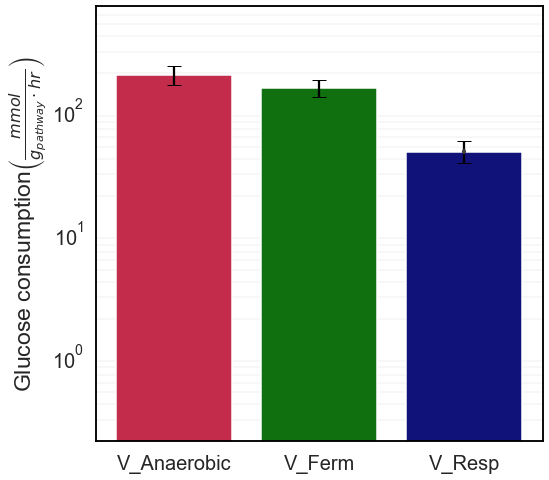

In [35]:
#Glucose consumption specific activities for E. coli Extended Data Fig. 4g
fig = activityPlot(ecoli_anaerobic, 'glucose')

fig.savefig('./Figures/edf4g_ecoli_glucose_specific_activity.svg',format='svg', dpi=1200)

386.00478716860295
1668.092954342632
1102.0315525550654


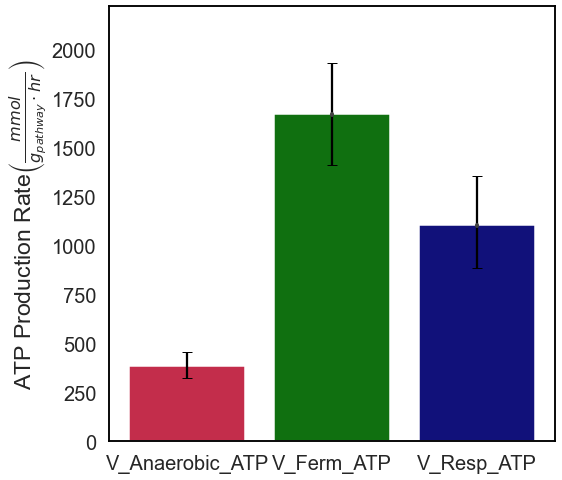

In [36]:
#ATP production specific activities for E. coli Fig. 2d
fig = activityPlot(ecoli_anaerobic, 'ATP')

fig.savefig('./Figures/fig2d_ecoli_atp_specific_activity.svg',format='svg', dpi=1200)

In [37]:
def waburgRates(rates, ferm_proteomics, resp_proteomics, gly_proteomics, Y_Ferm, Y_Resp): 
    
    '''For yeast and mammlian cells, performs bootstrapping to resample the five parameter estimates (i.e. fraction of 
    the proteome occupied by pathway, specific activity, and ATP yield) with replacement (N=10,000). 
    After each round of sampling, the specific activity of each pathway is calculated. The sampled 
    parameter values for proteome occupied by pathway, specific activity, and ATP yield from each 
    round of bootstrapping are used in the linear program described in the function above. 
    All 10,000 results are stored in a data frame, which is the output.'''

    results_final = []
    
    for j in tqdm(range(10000)):
    
        #random choice with replacement for each paramter 
        sample_activity_respiration = rates.loc[rates['pathway'] == 'Respiration', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique()
        #print(sample_activity_respiration)
        sample_activity_fermentation = rates.loc[rates['pathway'] == 'Fermentation', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique()
        #print(sample_activity_fermentation)
        sample_mass_respiraition = resp_proteomics.loc[(resp_proteomics['estimate'] == 'respiration'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_fermentation = ferm_proteomics.loc[(ferm_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_glycolysis = gly_proteomics.loc[(gly_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        
        sample_size_activity_respiration = len(sample_activity_respiration)
        sample_size_activity_fermentation = len(sample_activity_fermentation)
        sample_size_mass_respiraition = len(sample_mass_respiraition)
        sample_size_mass_fermentation = len(sample_mass_fermentation)
        sample_size_mass_glycolysis= len(sample_mass_glycolysis)
    
        sample_specific_activity_fermentation = np.random.choice(sample_activity_fermentation, size=sample_size_activity_fermentation,replace=True)
        sample_specific_activity_respiration = np.random.choice(sample_activity_respiration, size=sample_size_activity_respiration, replace=True)
        sample_fraction_fermentation = np.random.choice(sample_mass_fermentation, size=sample_size_mass_fermentation, replace=True)
        sample_fraction_respiration = np.random.choice(sample_mass_respiraition, size=sample_size_mass_respiraition, replace=True)
        sample_fraction_glycolysis = np.random.choice(sample_mass_glycolysis, size=sample_size_mass_glycolysis, replace=True)
        
        V_Ferm =  sample_specific_activity_fermentation.mean() / sample_fraction_fermentation.mean() 
        V_Resp =  sample_specific_activity_respiration.mean() / sample_fraction_respiration.mean() 
    
        rate_ratio = V_Resp / V_Ferm
        
        V_Resp =  sample_specific_activity_respiration.mean() / (sample_fraction_respiration.mean() + sample_fraction_glycolysis.mean() * rate_ratio)

        #ATP yield
        Y_Ferm = Y_Ferm
        Y_Resp = Y_Resp
        
        #ATP Production Rate 
        V_Ferm_ATP = V_Ferm * Y_Ferm
        V_Resp_ATP = V_Resp * Y_Resp
        
        results = [V_Ferm, V_Resp, V_Ferm_ATP, V_Resp_ATP]
        
        #Append the outputs for each bootstrap iteration
        results_final.append(results)
    
    #print(len(results_final))
    #Convert the array into a dataframe
    df = pd.DataFrame({'V_Ferm' : [], 'V_Resp' : [], 'V_Ferm_ATP' : [], 'V_Resp_ATP' : []})

    for i in range(len(results_final)):
        df_temp_vferm = pd.DataFrame({'V_Ferm' : [results_final[i][0]]})
        df_temp_vresp = pd.DataFrame({'V_Resp' : [results_final[i][1]]})
        df_temp_vfermatp = pd.DataFrame({'V_Ferm_ATP' : [results_final[i][2]]})
        df_temp_vrespatp = pd.DataFrame({'V_Resp_ATP' : [results_final[i][3]]})
        out = df_temp_vferm.join([df_temp_vresp, df_temp_vfermatp, df_temp_vrespatp])
        
        df = pd.concat([df, out])
        
    return(df)

In [38]:
def waburgCI(df): 
    
    '''For yeast and mammlian cells, calculates the 95 confidence interval for each output of the model'''

    df_sub = df[['V_Ferm', 'V_Resp', 'V_Ferm_ATP', 'V_Resp_ATP']]
    
    conf95_high = []
    conf95_low = []

    for column in list(df_sub.columns): 
        df_temp = df_sub[[column]]
        sample = np.array(df_temp[column])
        #mean, sigma = np.mean(sample), np.std(sample)
        #conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
        #confidence95 = mean - conf_int[0]
        sample_count = len(sample)
        sample_high = sample_count * .975
        sample_low = sample_count * .025
        sample = np.sort(sample)
        #print(type(sample[int(sample_high) - 1]))
        conf95_high = np.append(conf95_high, sample[int(sample_high) - 1])
        conf95_low = np.append(conf95_low, sample[int(sample_low) - 1])
        
    df = pd.DataFrame({'conf95_low': conf95_low, 'conf95_high': conf95_high}, 
                      index = ['V_Ferm', 'V_Resp', 'V_Ferm_ATP', 'V_Resp_ATP'])
    
    return(df)  

In [39]:
def activityPlot(data, graph_type):
    
    'For yeast and mammalian cells, plots the results of the warburgRate function'

    data2 = data.melt()
    data2['label'] = 'none'
    data2.loc[data2['variable'].str.contains('Ferm'), 'label'] = 'Fermentation'
    data2.loc[data2['variable'].str.contains('Resp'), 'label'] = 'Respiration'

    if graph_type == 'glucose': 
    
        data2 = data2.loc[~(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())

        fig, ax = plt.subplots(figsize=(8,8))

        # plot a bar chart
        colors = ["crimson", "darkblue"]
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci=95, capsize=0, zorder=2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = waburgCI(data)
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])

        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 7)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("Glucose consumption" r'$ \left(\frac{mmol}{g_{pathway} \cdot hr^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.3')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((.2,700))

    if graph_type == 'ATP': 

        data2 = data2.loc[(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())
        
        fig, ax = plt.subplots(figsize=(8,8))
    
        # plot a bar chart
        colors = ["crimson", "darkblue"]
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci="sd", capsize=0.2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = waburgCI(data)
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])
        
        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 5)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("ATP Production Rate" r'$ \left(\frac{mmol}{g_{pathway} \cdot hr^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        #ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.2')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((0,yerr['conf95_high'][2] * 1.15))

    return(fig)
    

In [40]:
#Specific acitivity estimate inputs for S. cerevisiae

#parameter estimates for proteome occupany
resp_proteomics = pd.read_csv('./Data/yeast_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/yeast_specific_activity_ferm_occupancy.csv')
#gly_proteomics = pd.read_csv('yeast_specific_activity_glycolysis_occupancy.csv')

#rates
rates = pd.read_csv('./Data/yeast_cellular_rates.csv')

#Calculating specific activities
yeast = waburgRates(rates, ferm_proteomics, resp_proteomics, ferm_proteomics, 2, 20)

  0%|          | 0/10000 [00:00<?, ?it/s]

211.64811771811898
14.667815052783705


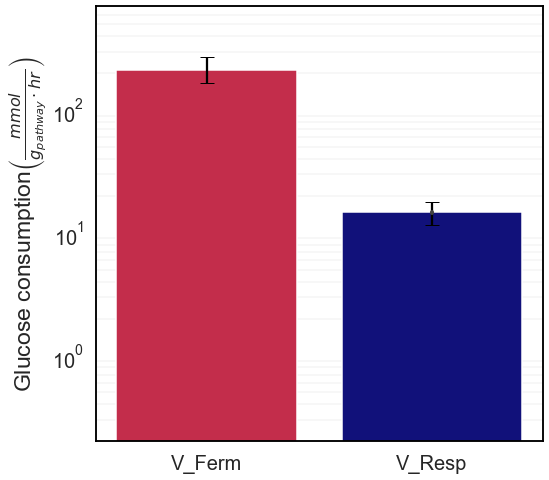

In [41]:
#Glucose consumption specific activities for S. cerevisiae Extended Data Fig. 4h
fig = activityPlot(yeast, 'glucose')
fig.savefig('./Figures/edf4h_yeast_glucose_specific_activity.svg',format='svg', dpi=1200)

423.29623543623796
293.35630105567446


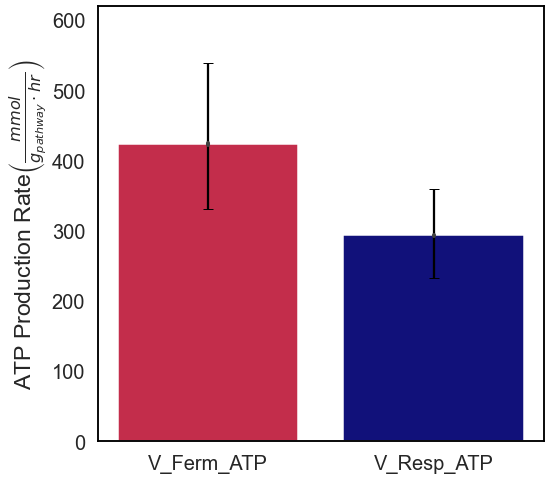

In [42]:
#ATP production specific activities for S. cerevisiae Fig. 2e
fig = activityPlot(yeast, 'ATP')
fig.savefig('./Figures/fig2e_scerevisiae_atp_specific_activity.svg',format='svg', dpi=1200)

In [43]:
#Specific acitivity estimate inputs for mammalian cells

#parameter estimates for proteome occupany
resp_proteomics = pd.read_csv('./Data/mammalian_specific_activity_resp_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/mammalian_specific_activity_ferm_occupancy.csv')
rates = pd.read_csv('./Data/mammalian_cellular_rates.csv')

#Calculating specific activities
mammalian = waburgRates(rates, ferm_proteomics, resp_proteomics, ferm_proteomics, 2, 28)

  0%|          | 0/10000 [00:00<?, ?it/s]

48.86046043327113
0.7292760129149937


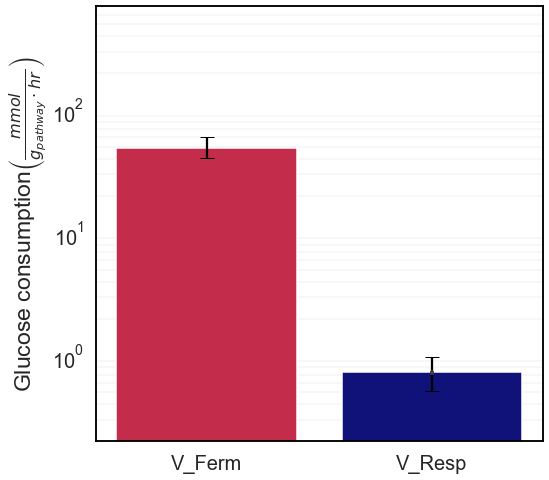

In [44]:
#Glucose consumption specific activities for mammalian cells Extended Data Fig. 4i
fig = activityPlot(mammalian, 'glucose')
fig.savefig('./Figures/edf4i_mammalian_glucose_specific_activity.svg',format='svg', dpi=1200)

97.72092086654226
20.41972836161974


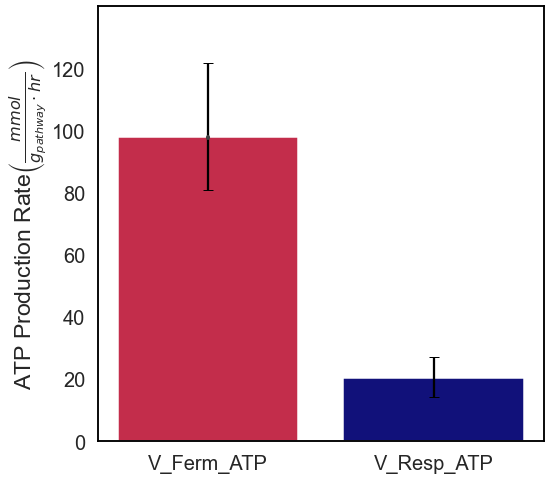

In [45]:
#ATP production specific activities for mammalian cells Fig. 2f
fig = activityPlot(mammalian, 'ATP')
fig.savefig('./Figures/fig2f_mammalian_atp_specific_activity.svg',format='svg', dpi=1200)